# Python 2年生 スクレイピングのしくみ (How scraping works)

Chapter 5

## Lesson 20 現在から5日間 (3時間ごと)の 天気を調べよう (Check the weather for the next 5 days (every 3 hours))

Data:

OpenWeatherMap

https://openweathermap.org/api

In [ ]:
! pip install japanize_matplotlib

In [ ]:
import requests
import json
from datetime import datetime, timedelta, timezone
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [ ]:
# Get weather for 5 days (every 3 hours)
url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP", key="API key")

jsondata = requests.get(url).json()
pprint(jsondata)

{'city': {'coord': {'lat': 35.6895, 'lon': 139.6917},
          'country': 'JP',
          'id': 1850144,
          'name': '東京都',
          'population': 12445327,
          'sunrise': 1744057092,
          'sunset': 1744103262,
          'timezone': 32400},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 0},
           'dt': 1744048800,
           'dt_txt': '2025-04-07 18:00:00',
           'main': {'feels_like': 10.18,
                    'grnd_level': 1014,
                    'humidity': 46,
                    'pressure': 1016,
                    'sea_level': 1016,
                    'temp': 11.75,
                    'temp_kf': -0.41,
                    'temp_max': 12.16,
                    'temp_min': 11.75},
           'pop': 0,
           'sys': {'pod': 'n'},
           'visibility': 10000,
           'weather': [{'description': '晴天',
                        'icon': '01n',
                        'id': 800,
                        'main': 'Clear'}],
           'wi

In [ ]:
# Get weather for 5 days (every 3 hours)
timestamp = 1562889600

tz = timezone(timedelta(), 'UTC')
utc = datetime.fromtimestamp(timestamp, tz)
print(utc)

tz = timezone(timedelta(hours=+9), 'JST')
jst = datetime.fromtimestamp(timestamp, tz)
print(jst)
print(str(jst)[:-9])

2019-07-12 00:00:00+00:00
2019-07-12 09:00:00+09:00
2019-07-12 09:00


In [ ]:
tz = timezone(timedelta(hours=+9), 'JST')
for dat in jsondata["list"]:
    jst = str(datetime.fromtimestamp(dat["dt"], tz))[:-9]
    print("UST={ust}, JST={jst}".format(ust=dat["dt_txt"],jst=jst))

UST=2025-04-07 18:00:00, JST=2025-04-08 03:00
UST=2025-04-07 21:00:00, JST=2025-04-08 06:00
UST=2025-04-08 00:00:00, JST=2025-04-08 09:00
UST=2025-04-08 03:00:00, JST=2025-04-08 12:00
UST=2025-04-08 06:00:00, JST=2025-04-08 15:00
UST=2025-04-08 09:00:00, JST=2025-04-08 18:00
UST=2025-04-08 12:00:00, JST=2025-04-08 21:00
UST=2025-04-08 15:00:00, JST=2025-04-09 00:00
UST=2025-04-08 18:00:00, JST=2025-04-09 03:00
UST=2025-04-08 21:00:00, JST=2025-04-09 06:00
UST=2025-04-09 00:00:00, JST=2025-04-09 09:00
UST=2025-04-09 03:00:00, JST=2025-04-09 12:00
UST=2025-04-09 06:00:00, JST=2025-04-09 15:00
UST=2025-04-09 09:00:00, JST=2025-04-09 18:00
UST=2025-04-09 12:00:00, JST=2025-04-09 21:00
UST=2025-04-09 15:00:00, JST=2025-04-10 00:00
UST=2025-04-09 18:00:00, JST=2025-04-10 03:00
UST=2025-04-09 21:00:00, JST=2025-04-10 06:00
UST=2025-04-10 00:00:00, JST=2025-04-10 09:00
UST=2025-04-10 03:00:00, JST=2025-04-10 12:00
UST=2025-04-10 06:00:00, JST=2025-04-10 15:00
UST=2025-04-10 09:00:00, JST=2025-

In [ ]:
for dat in jsondata["list"]:
    jst = str(datetime.fromtimestamp(dat["dt"], tz))[:-9]
    weather = dat["weather"][0]["description"]
    temp = dat["main"]["temp"]
    print("日時:{jst}, 天気:{w}, 気温:{t}度".format(jst=jst, w=weather, t=temp))

日時:2025-04-08 03:00, 天気:晴天, 気温:11.75度
日時:2025-04-08 06:00, 天気:薄い雲, 気温:11.65度
日時:2025-04-08 09:00, 天気:雲, 気温:12.87度
日時:2025-04-08 12:00, 天気:雲, 気温:17.61度
日時:2025-04-08 15:00, 天気:雲, 気温:18.38度
日時:2025-04-08 18:00, 天気:曇りがち, 気温:18.83度
日時:2025-04-08 21:00, 天気:雲, 気温:17.65度
日時:2025-04-09 00:00, 天気:晴天, 気温:15.71度
日時:2025-04-09 03:00, 天気:晴天, 気温:14.23度
日時:2025-04-09 06:00, 天気:晴天, 気温:13.29度
日時:2025-04-09 09:00, 天気:晴天, 気温:15.75度
日時:2025-04-09 12:00, 天気:晴天, 気温:18.57度
日時:2025-04-09 15:00, 天気:晴天, 気温:19.87度
日時:2025-04-09 18:00, 天気:晴天, 気温:18.77度
日時:2025-04-09 21:00, 天気:曇りがち, 気温:15度
日時:2025-04-10 00:00, 天気:厚い雲, 気温:14.31度
日時:2025-04-10 03:00, 天気:厚い雲, 気温:13.79度
日時:2025-04-10 06:00, 天気:曇りがち, 気温:13.74度
日時:2025-04-10 09:00, 天気:小雨, 気温:16.32度
日時:2025-04-10 12:00, 天気:小雨, 気温:17.05度
日時:2025-04-10 15:00, 天気:厚い雲, 気温:17.94度
日時:2025-04-10 18:00, 天気:厚い雲, 気温:17.59度
日時:2025-04-10 21:00, 天気:厚い雲, 気温:16.8度
日時:2025-04-11 00:00, 天気:厚い雲, 気温:15.48度
日時:2025-04-11 03:00, 天気:小雨, 気温:14.37度
日時:2025-04-11 06:00, 天気:厚い雲, 気温:15.06度
日時:202

In [ ]:
df = pd.DataFrame(columns=["気温"])
for dat in jsondata["list"]:
    jst = str(datetime.fromtimestamp(dat["dt"], tz))[:-9]
    temp = dat["main"]["temp"]
    df.loc[jst] = temp

pprint(df)

                     気温
2025-04-08 03:00  11.75
2025-04-08 06:00  11.65
2025-04-08 09:00  12.87
2025-04-08 12:00  17.61
2025-04-08 15:00  18.38
2025-04-08 18:00  18.83
2025-04-08 21:00  17.65
2025-04-09 00:00  15.71
2025-04-09 03:00  14.23
2025-04-09 06:00  13.29
2025-04-09 09:00  15.75
2025-04-09 12:00  18.57
2025-04-09 15:00  19.87
2025-04-09 18:00  18.77
2025-04-09 21:00  15.00
2025-04-10 00:00  14.31
2025-04-10 03:00  13.79
2025-04-10 06:00  13.74
2025-04-10 09:00  16.32
2025-04-10 12:00  17.05
2025-04-10 15:00  17.94
2025-04-10 18:00  17.59
2025-04-10 21:00  16.80
2025-04-11 00:00  15.48
2025-04-11 03:00  14.37
2025-04-11 06:00  15.06
2025-04-11 09:00  17.64
2025-04-11 12:00  18.39
2025-04-11 15:00  19.98
2025-04-11 18:00  19.23
2025-04-11 21:00  17.62
2025-04-12 00:00  16.47
2025-04-12 03:00  15.61
2025-04-12 06:00  15.06
2025-04-12 09:00  17.40
2025-04-12 12:00  19.81
2025-04-12 15:00  21.45
2025-04-12 18:00  18.46
2025-04-12 21:00  16.31
2025-04-13 00:00  15.59


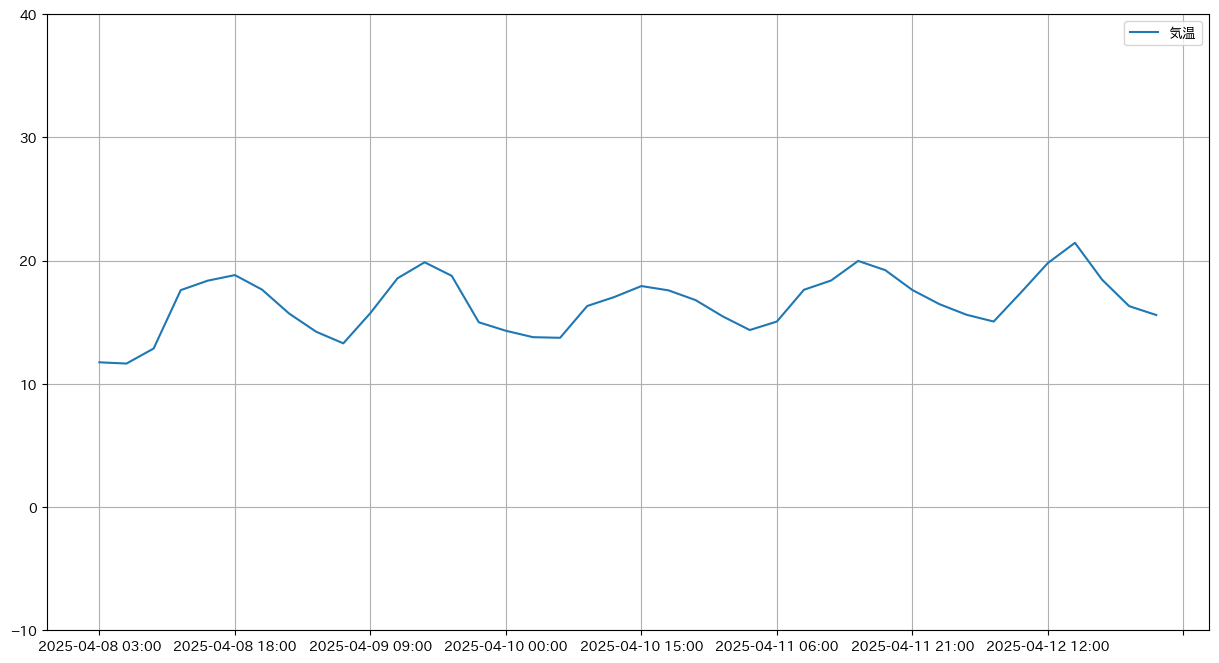

In [ ]:
df.plot(figsize=(15,8))
plt.ylim(-10,40)
plt.grid()
plt.show()